### Load dependencies 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Prepare Data

In [2]:
df = pd.read_csv("spam.csv", encoding = 'latin-1') 
# Data Source: UCI machine learning repository-- SMS Spam Collection dataset

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"label", "v2":"text"})

In [5]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

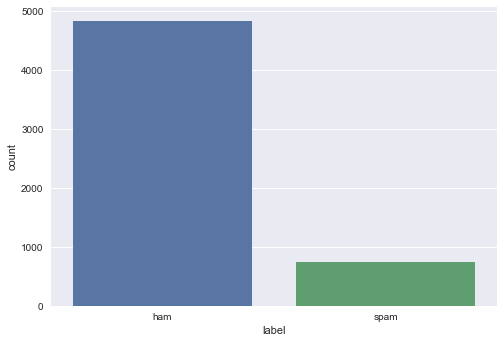

In [24]:
sns.countplot(data['label'],label="Count")
plt.show()

In [6]:
data['label_numeric'] = list(map(lambda x: 1 if x == "spam" else 0, data["label"]))
# make numerical labels

In [ ]:
data.head()

### Train-Test split

In [7]:
# Train-test split
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 1)
np.shape(train_set)

(4457, 3)

### Text transformation

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
train_set_vect = count_vect.fit_transform(train_set.text)
test_set_vect = count_vect.transform(test_set.text)

In [9]:
print(np.shape(train_set_vect))
print(np.shape(test_set_vect))

(4457, 7774)
(1115, 7774)


In [10]:
print(len(count_vect.get_feature_names()))

7774


### Naive Bayes Classifier 

In [11]:
#Multimomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(train_set_vect, train_set.label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Test Model

In [12]:
# Test model
SMS = ["Free ticket", "Good Morning"]
SMS_vect = count_vect.transform(SMS)
print(model.predict(SMS_vect))


['spam' 'ham']


### Performance measure

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [14]:
prediction = model.predict(test_set_vect)
prediction_numeric = list(map(lambda x: 1 if x == "spam" else 0, prediction))

In [15]:
accuracy_score(prediction, test_set.label)

0.98475336322869955

In [16]:
confusion_matrix(prediction, test_set.label)

array([[968,   9],
       [  8, 130]])

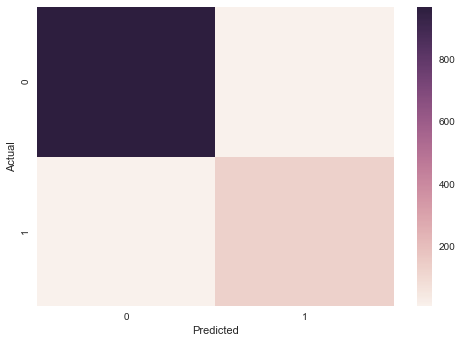

In [17]:
sns.heatmap(confusion_matrix(prediction, test_set.label.tolist()))
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [19]:
precision_score(test_set.label_numeric, prediction_numeric)

0.94202898550724634

In [20]:
recall_score(prediction_numeric, test_set.label_numeric)

0.94202898550724634

In [23]:
f1_score(prediction_numeric, test_set.label_numeric)

0.93862815884476525